<a href="https://colab.research.google.com/github/halldm2000/NOAA-AI-2020-TUTORIAL/blob/master/03_FullyConnected/neural_net_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mount Google Drive to load files that you saved**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Reconstruct the same model, then load its parameters from file**

In [101]:
import torch, torch.nn as nn

# USE SAME MODEL
N = 30
model = nn.Sequential(nn.Linear(2,N), nn.ReLU(), nn.Linear(N,1))

# LOAD 
model.load_state_dict(torch.load("/content/drive/My Drive/model-seaice-2d.pt"))
model.eval()
torch.set_grad_enabled(False)

**Use model to make predictions**

In [109]:
import torch

# generate smoe input dates

yr1   = 1960
yr2   = 2040
ndays = (yr2-yr1)*365
i     = torch.linspace(0,ndays,ndays+1)
year  = yr1 + i/365
day   = i%365
x = torch.stack( (year, day) ).T

# scale data, the same way our training data was scaled

xmean  = torch.tensor([2001.31858988,  183.23399752])
xvar   = torch.tensor([127.48240021, 11056.31704533])
xstd   = torch.sqrt(xvar)

ymean  = torch.tensor([11.27866878])
yvar   = torch.tensor(10.94774077)
ystd   = torch.sqrt(yvar)

x -= xmean
x /= xstd

# predict sea-ice extent and unscale

y = model(x)
extent = y*ystd + ymean

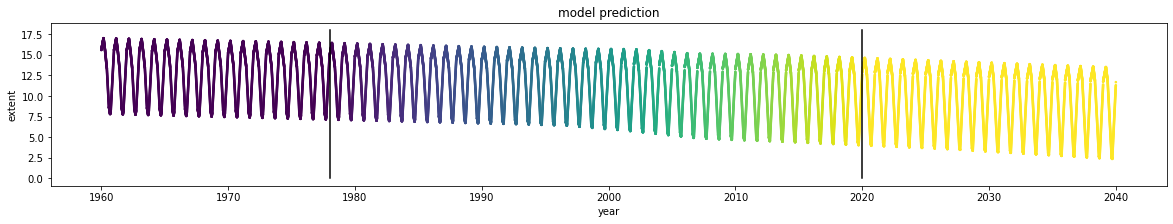

In [112]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,3))
plt.scatter(year, extent, c=year, marker='.',s=10,alpha=1);
plt.clim(1978,2020)
plt.plot([1978,1978],[0,18],'k')
plt.plot([2020,2020],[0,18],'k')
plt.xlabel('year')
plt.ylabel('extent')
plt.title('model prediction');

In [ ]:
year

tensor([1978., 1978., 1978.,  ..., 2019., 2019., 2020.])